In [36]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [37]:
df_kiva_loans = pd.read_csv("./kiva_loans.csv")
df_mpi = pd.read_csv("./kiva_mpi_region_locations.csv")

In [38]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


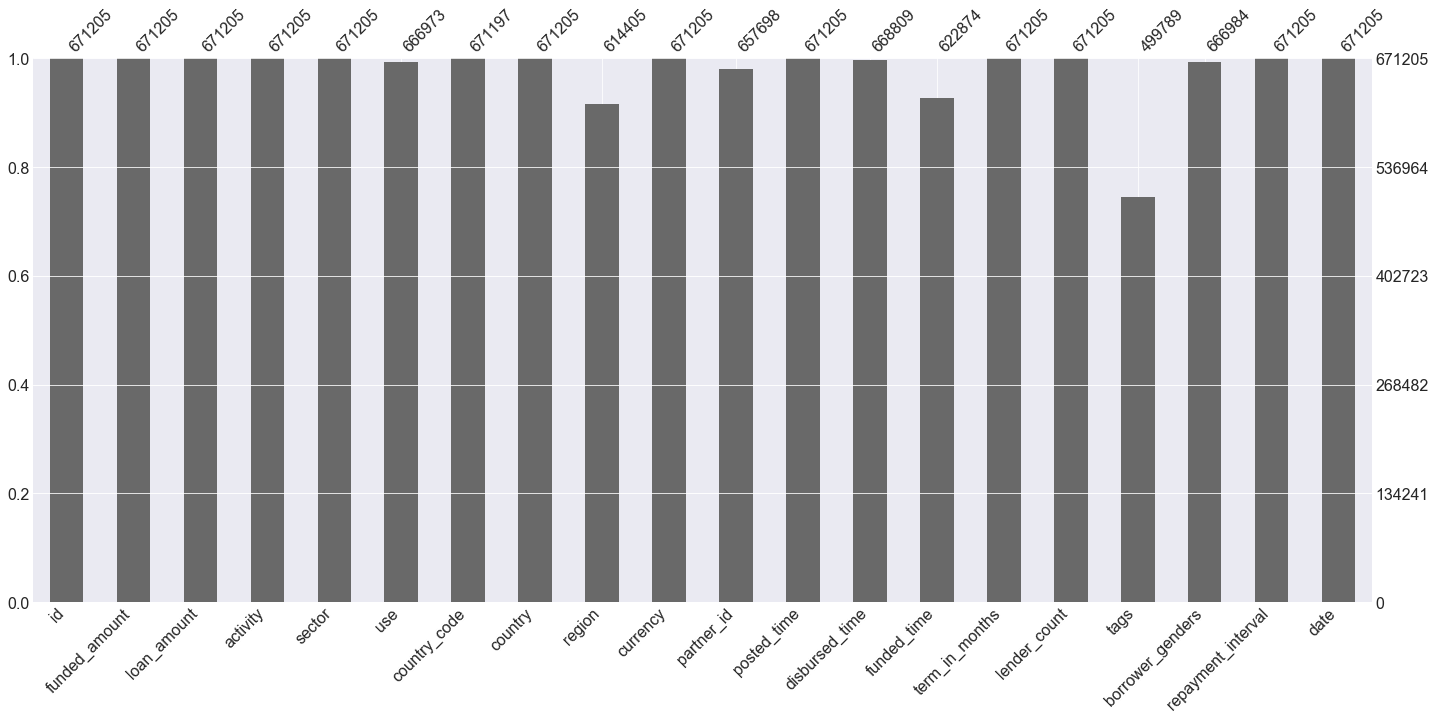

In [39]:
msno.bar(df_kiva_loans)

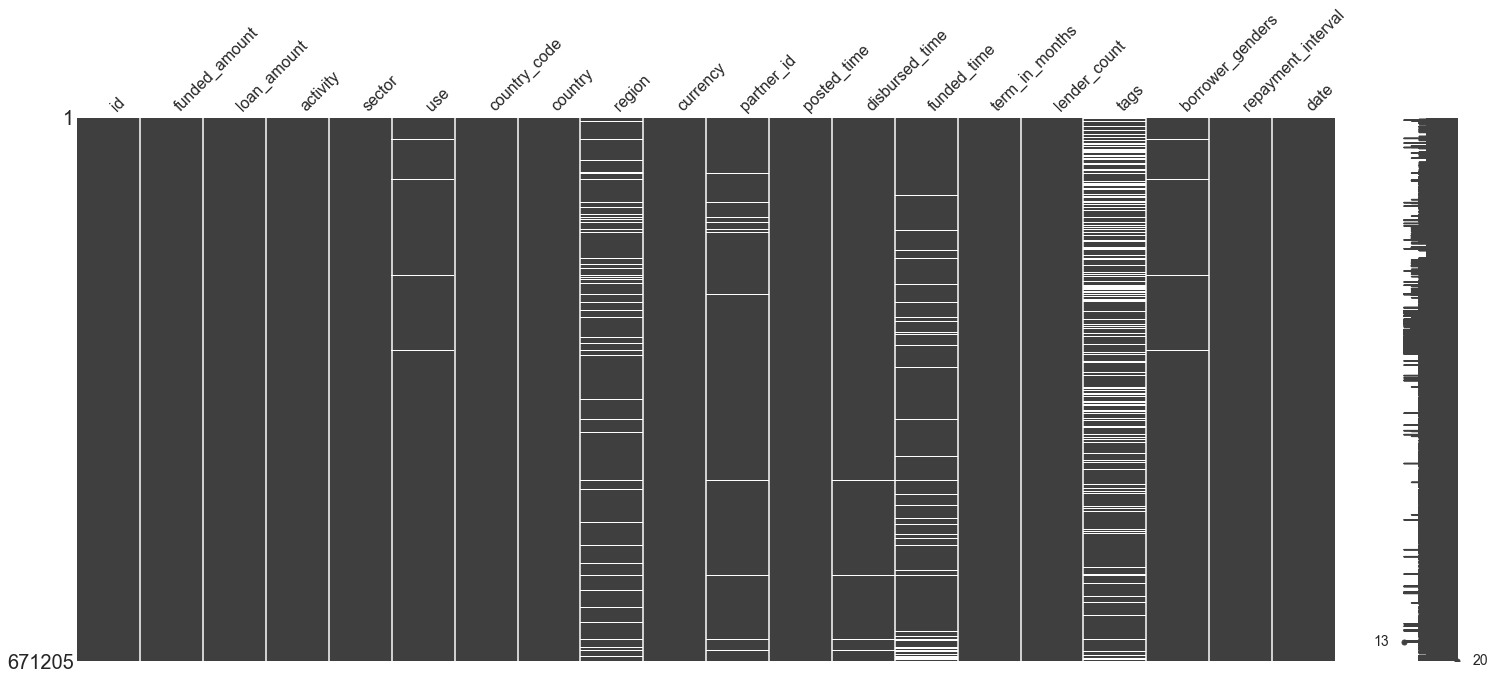

In [40]:
msno.matrix(df_kiva_loans)

In [41]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [42]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [43]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [44]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)>0.005]
list_countries = list(countries.index)
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

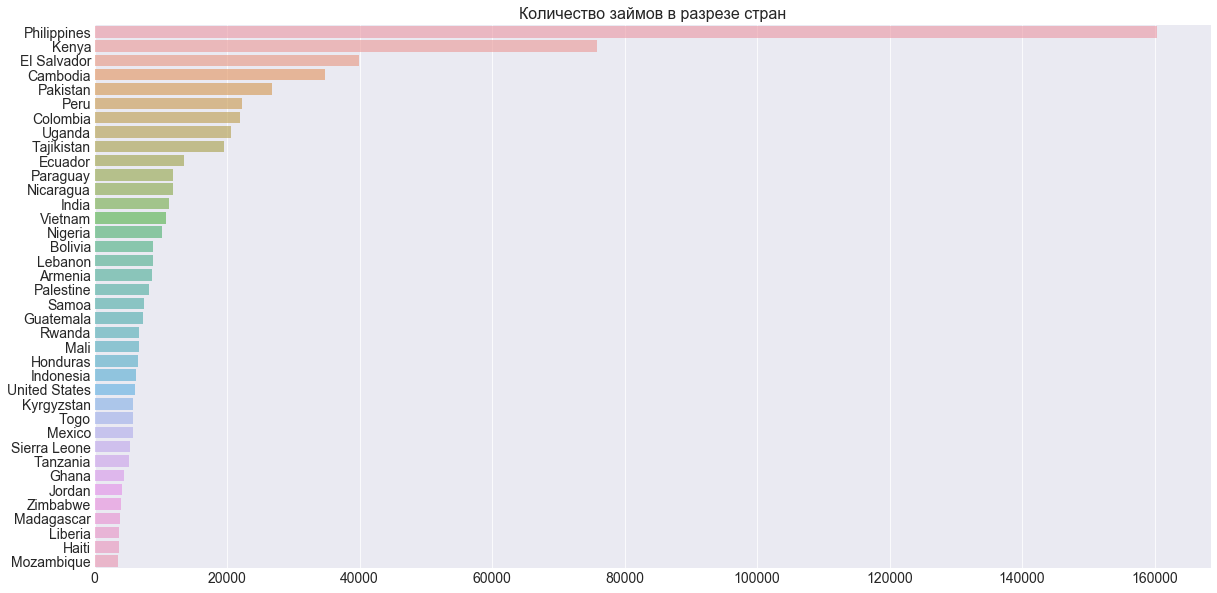

In [45]:
plt.figure(figsize=(20,10))
plt.title('Количество займов в разрезе стран', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

In [46]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [47]:
df_mpi_grouped = df_mpi\
.groupby(['ISO', 'country', 'world_region'])['MPI']\
.mean()\
.fillna(0)\
.reset_index()

In [48]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [49]:
regions = df_kiva_loans['world_region'].value_counts()

In [50]:
regions_list = regions.index.to_list()

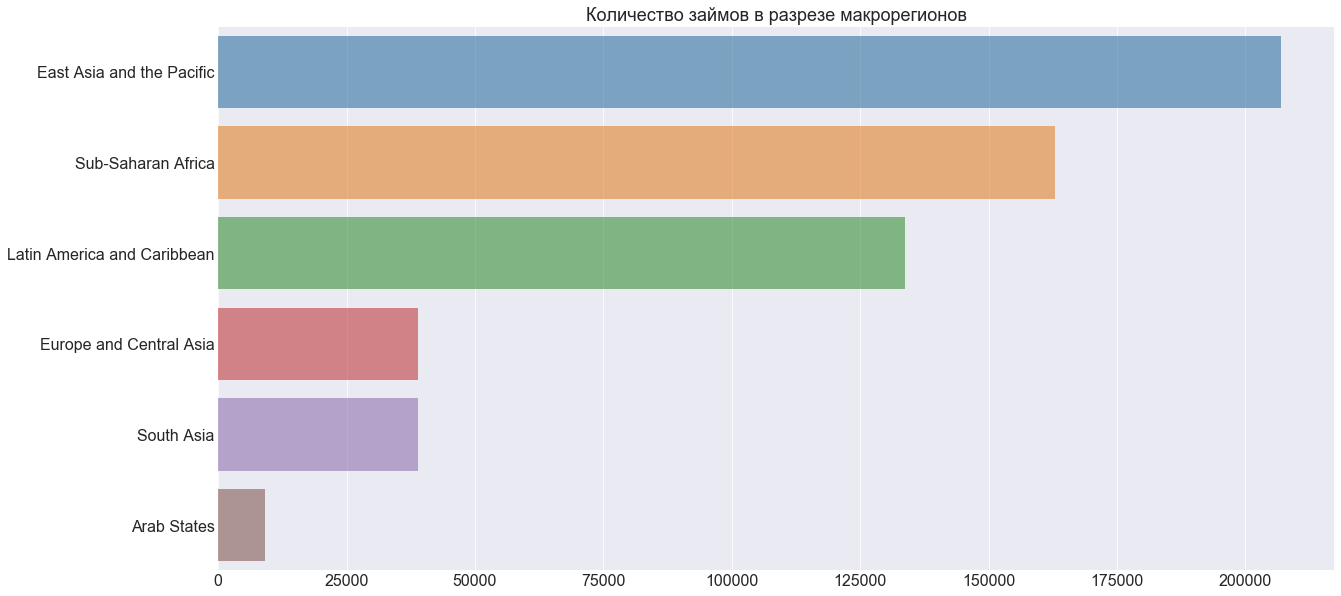

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title('Количество займов в разрезе макрорегионов', fontsize=18)
plt.tick_params(labelsize=16)
plt.show()

In [52]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                        426502
male                                                                                                                          134710
female, female                                                                                                                 12164
female, female, female                                                                                                         11676
female, female, female, female                                                                                                  9052
                                                                                                                               ...  
male, male, male, male, male, male, male, male, male, female, male, male, male, male, male, male, male, male, male, female         1
male, female, male, female, female, male, female, male, female, femal

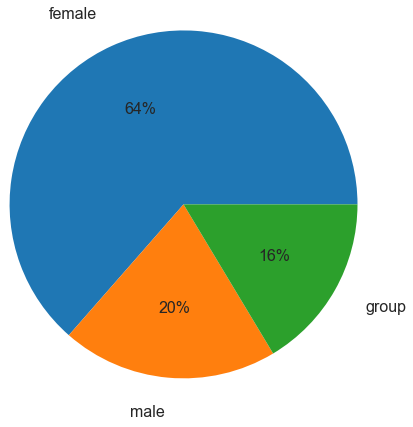

In [53]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group'for elem in df_kiva_loans['borrower_genders']]
borrowers = df_kiva_loans['borrower_genders'].value_counts()
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

In [54]:
df_gender_by_country = \
df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
.groupby(['country', 'borrower_genders'])['borrower_genders']\
.count()\
.groupby(level=0).apply(lambda x: 100 * x/ x.sum())\
.unstack('borrower_genders')\
.fillna(0)\
.sort_values(by=['female','male'])[-20:]
df_gender_by_country = df_gender_by_country[['female','male','group']]

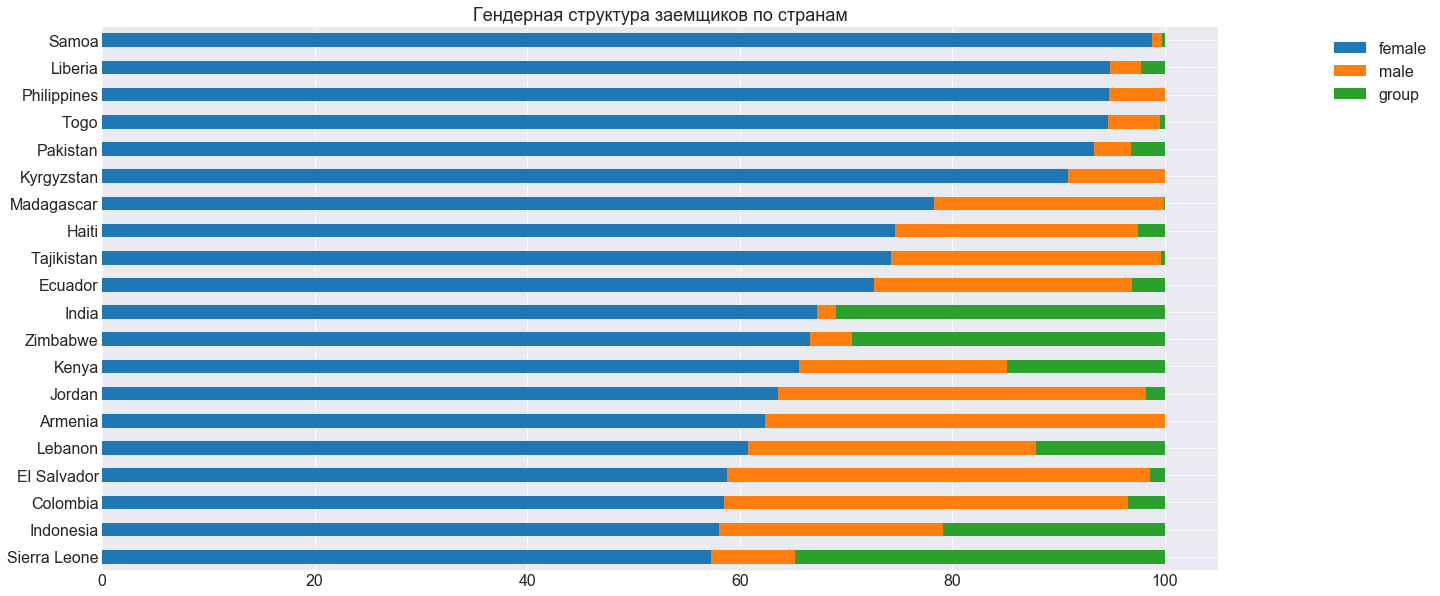

In [55]:
plot = df_gender_by_country.plot.barh(
figsize=(20,10)
,fontsize=16
,stacked=True
,title='Гендерная структура заемщиков по странам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

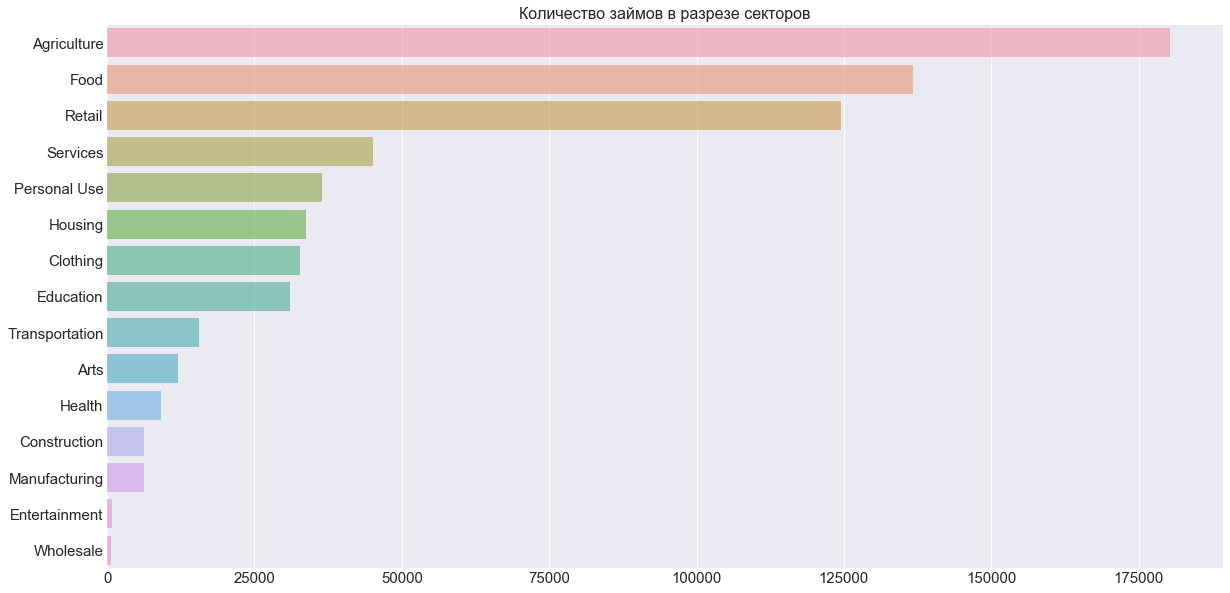

In [56]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
#plt.xlabel("Number of loans", fontsize=16)
#plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

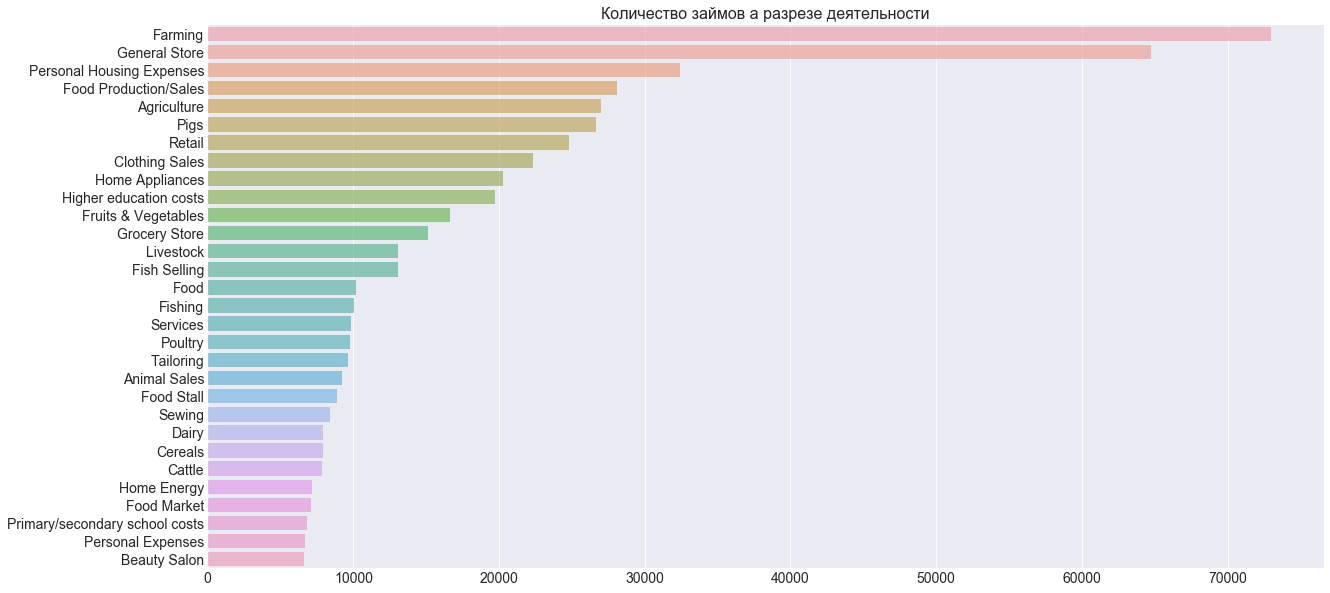

In [57]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title('Количество займов а разрезе деятельности', fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()

In [58]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities.head(25)

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

In [59]:
loans_by_activity_sector = \
df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
.groupby(['sector','activity'])['loan_amount']\
.count()\
.reset_index()
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


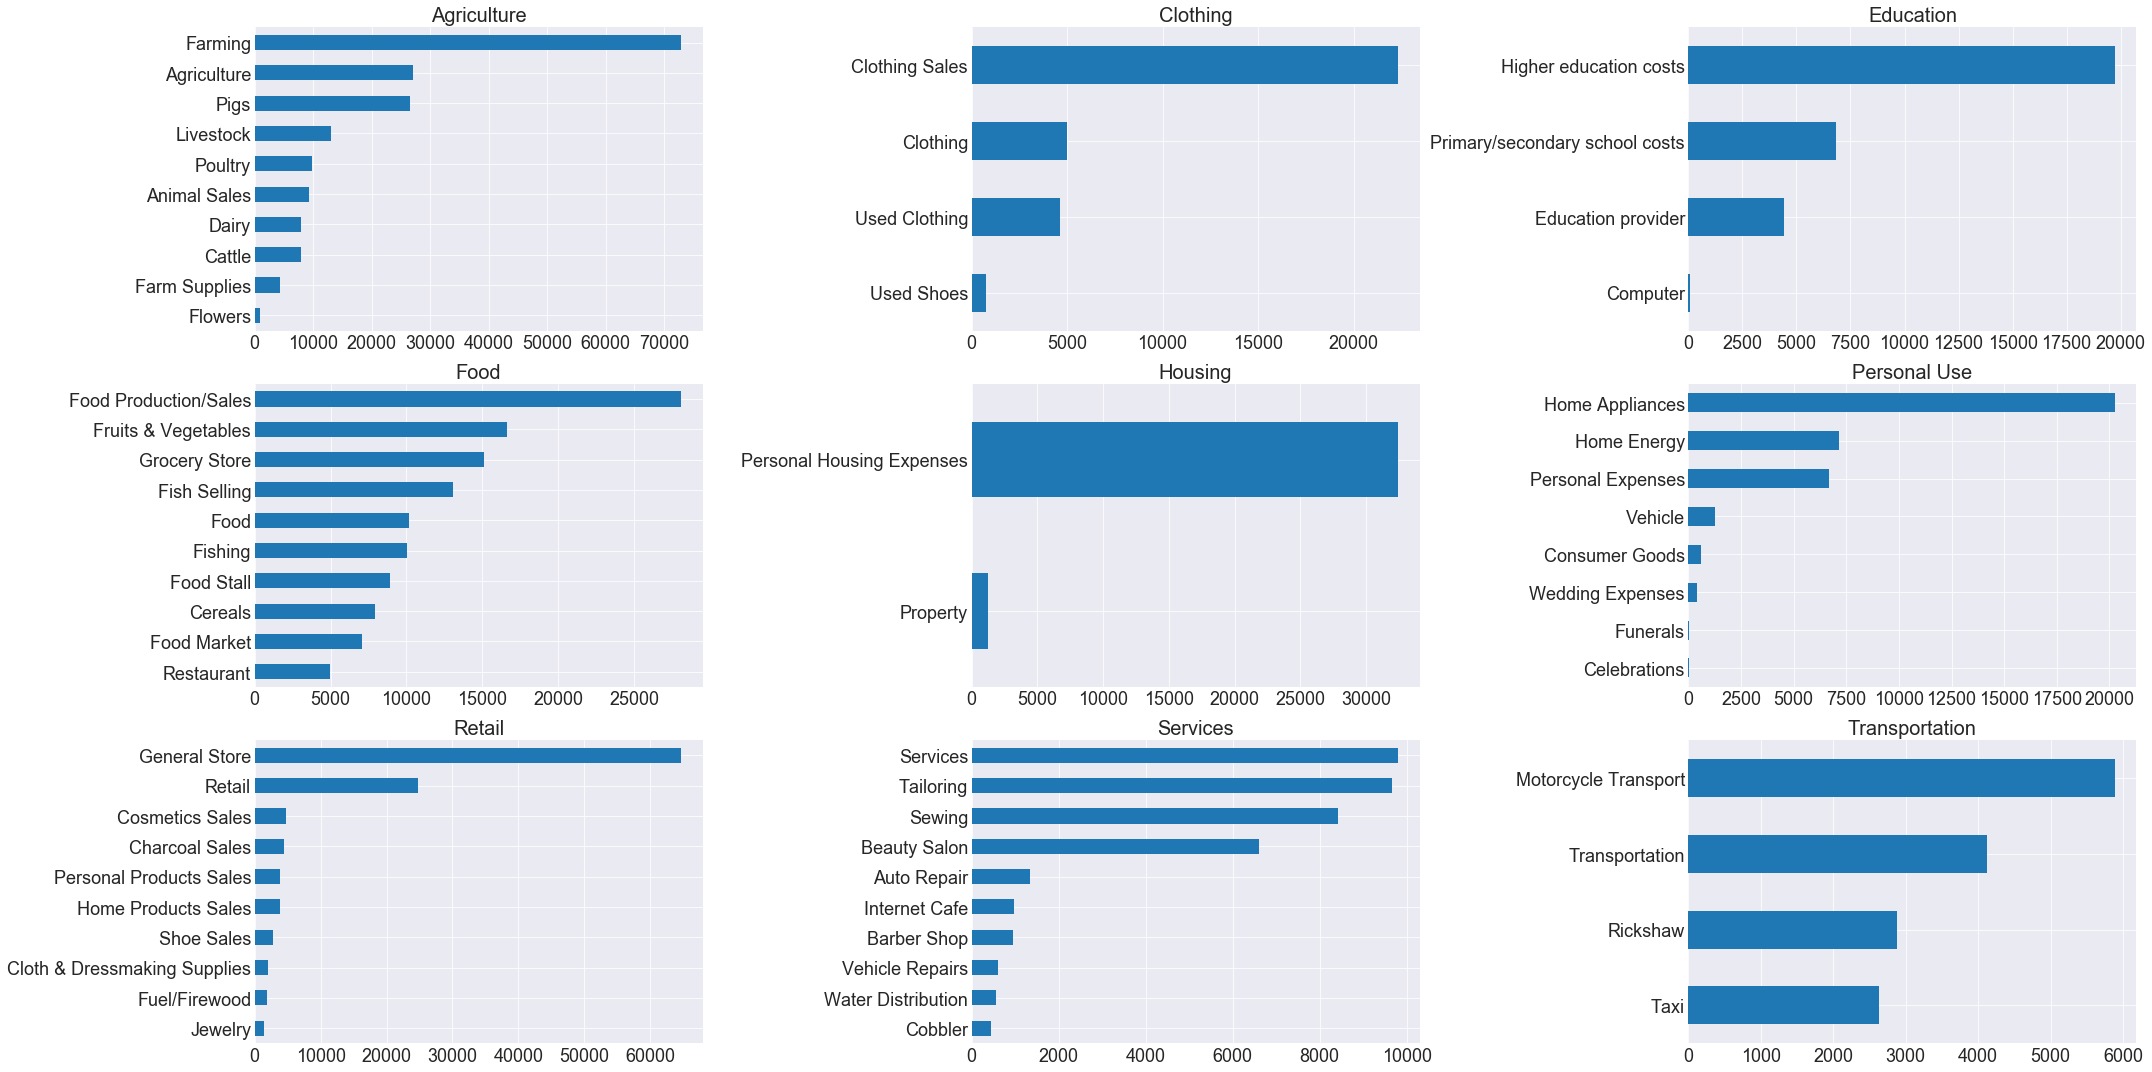

In [60]:
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
    .dropna()\
    .sort_values(by="loan_amount")[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize= 18)

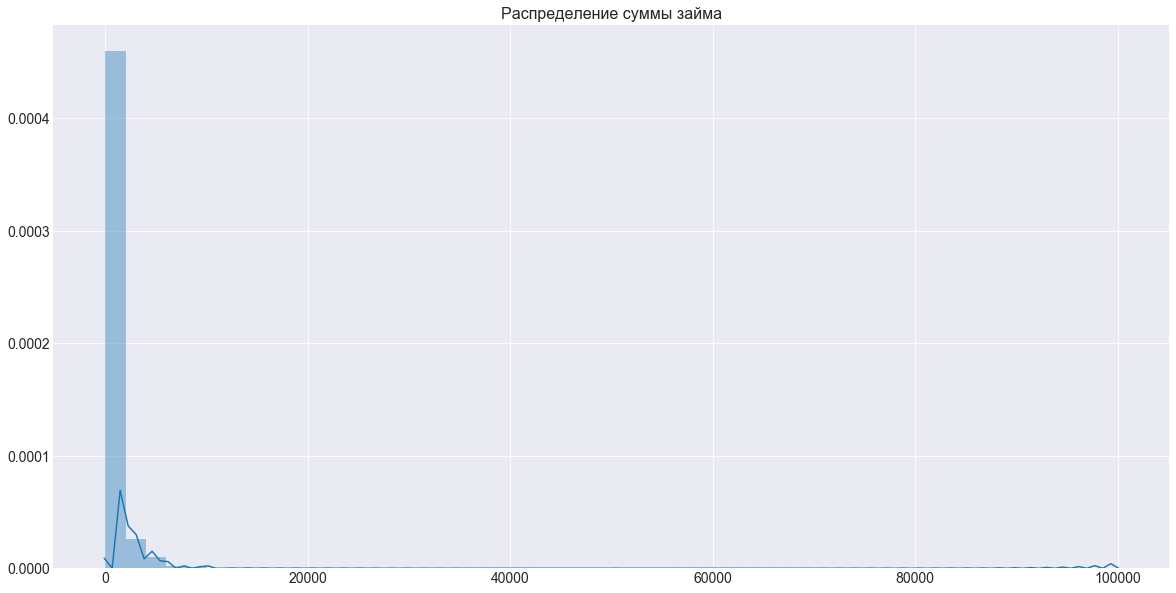

In [61]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

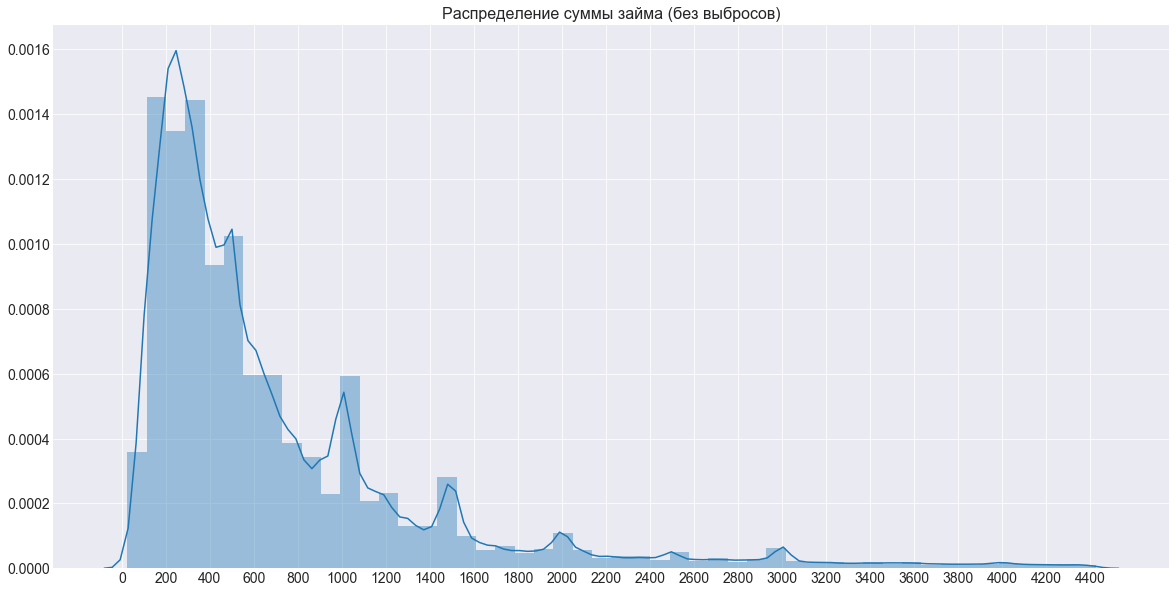

In [62]:
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
std = df_kiva_loans['loan_amount'].std()
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

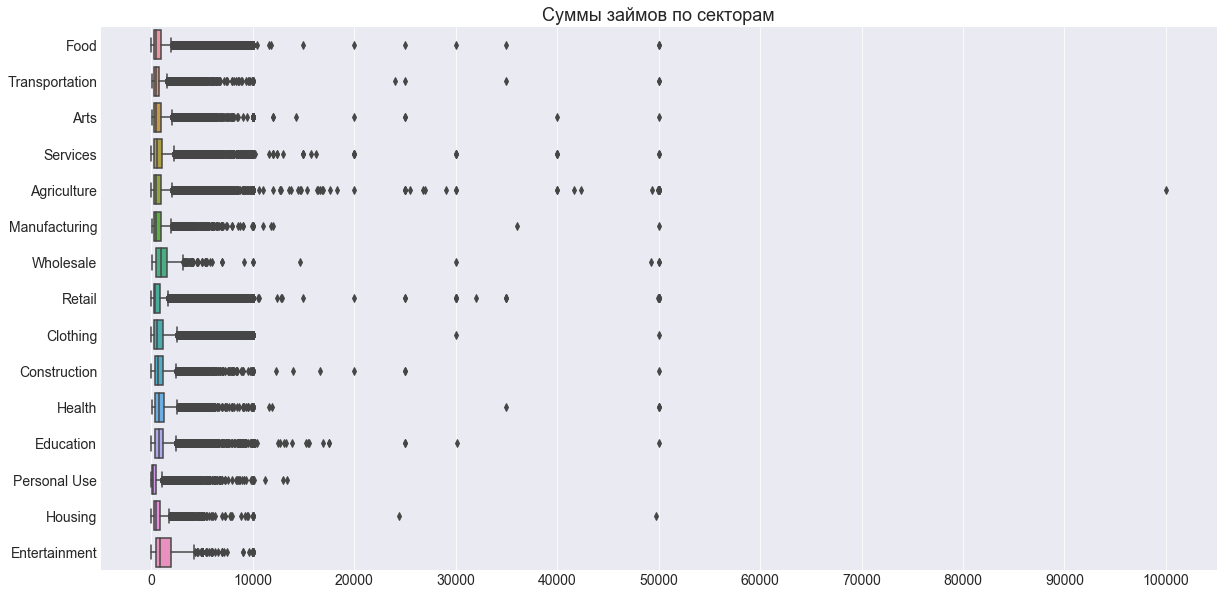

In [63]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

In [64]:
sector_mean_median = df_kiva_loans\
.groupby(['sector'])['loan_amount']\
.agg(median='median', mean='mean')\
.sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


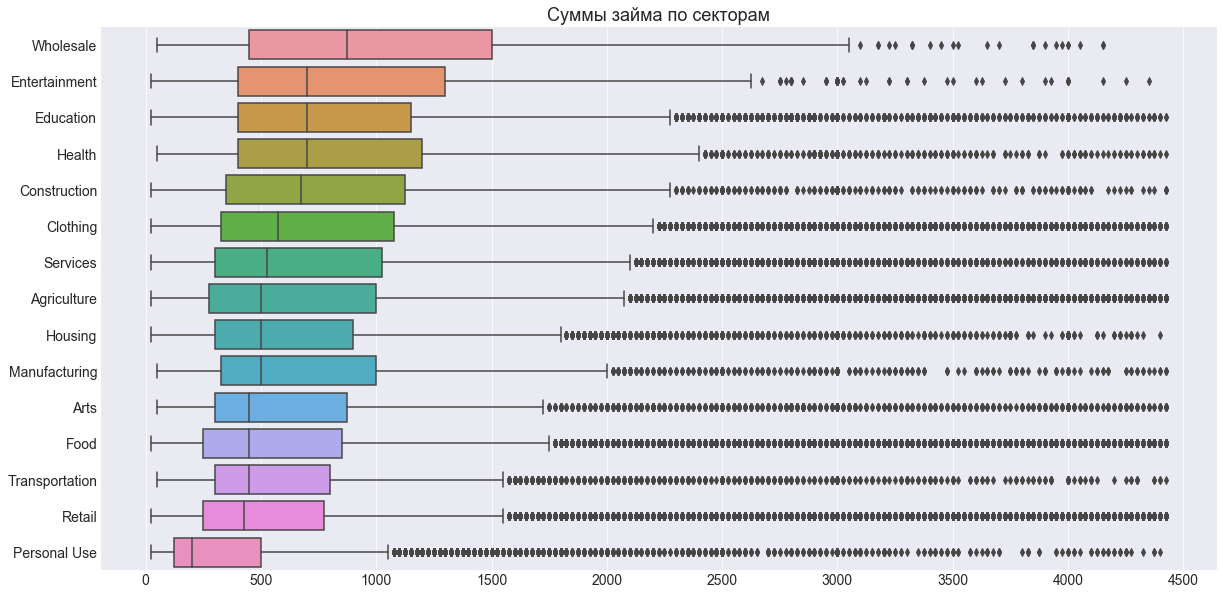

In [65]:
plt.figure(figsize=(20,10))
plt.title("Суммы займа по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

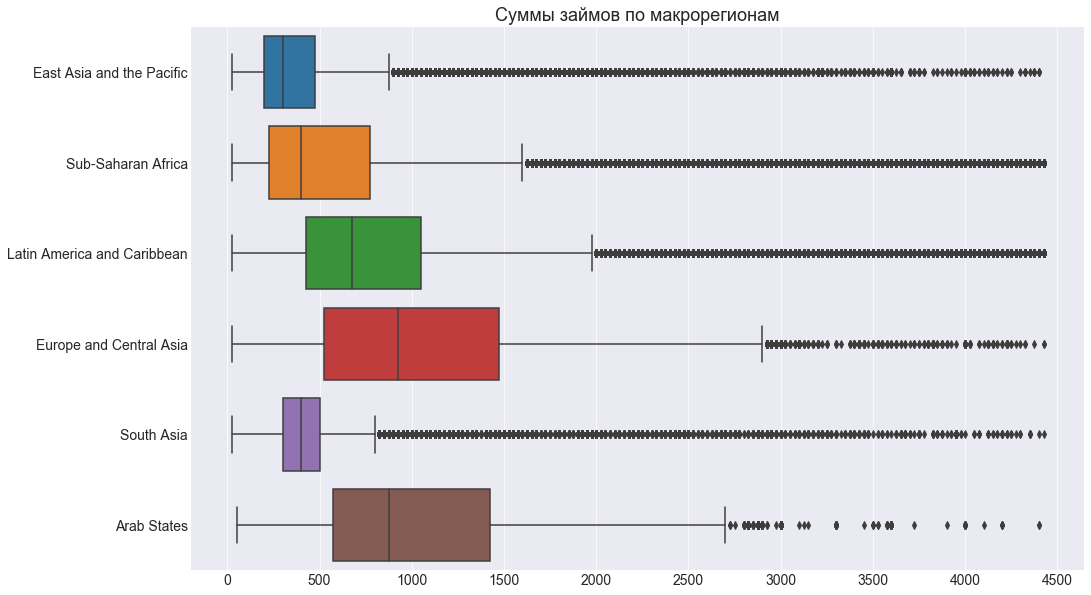

In [66]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='world_region', order=regions_list, data=df_kiva_loans_trimmed)\
.set(ylabel=None, xlabel=None)
plt.show()

In [75]:
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

dates = ['posted_time','disbursed_time']

df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()

#df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates['time_funding'].dtype

dtype('float64')

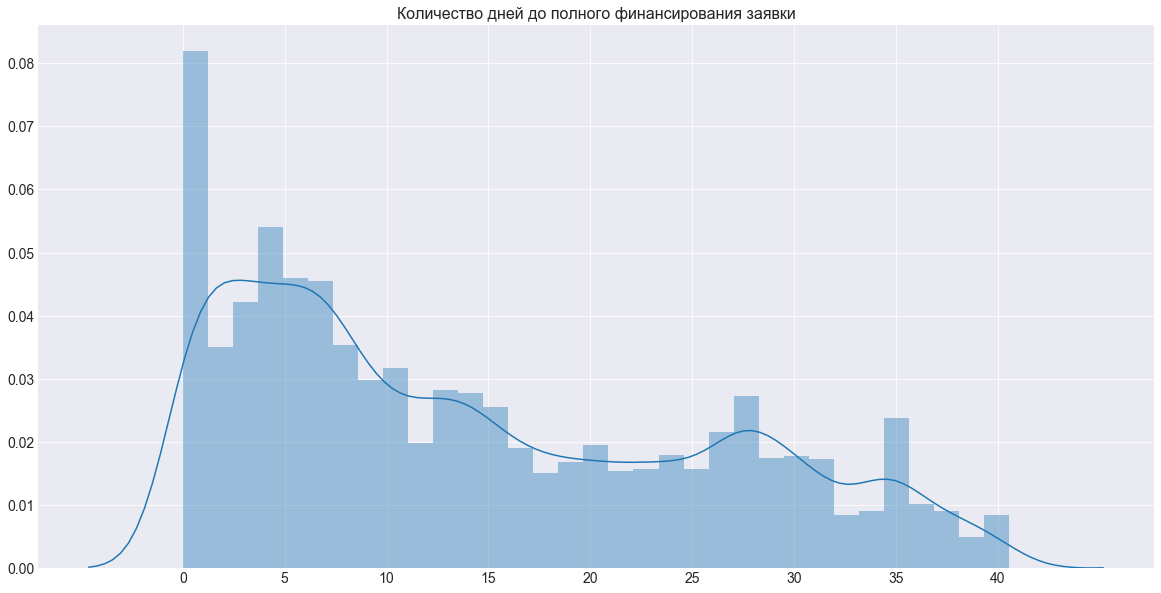

In [74]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
p = sns.jointplot(x='time_funding', y='loan_amount', data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40], 
                 ylim=[0,2200])\
.set_axis_labels('Количество дней', "Сумма займа", size=18)

# p.ax_joint.set_xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
# p.ax_joint.set_yticks(np.arange(0, max(df_loans_dates_trimmed['loan_amount']+1), 250))
p.ax_joint.tick_params(labelsize=14)

plt.show()

In [ ]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
.agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
.reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

In [ ]:
f,ax = plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title('Median of amount of days to full financing', fontsize=20)
ax[0].set_xlabel('Amount of days', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title('Median of loan amount', fontsize=20)
ax[1].set_xlabel('Sum USD', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [ ]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

In [ ]:
f,ax = plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title('медиана срока выплаты займа', fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title('Медиана суммы займа', fontsize=20)
ax[1].set_xlabel('Сумма в USD', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title('Медиана ежемесячного платежа', fontsize=20)
ax[2].set_xlabel('Сумма в USD', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df_loans_dates_trimmed.head()